In [1]:
pip install ucimlrepo

In [3]:
# installing ucimlrepo to fetch data from it.
# Fetching data from this repo(fetch_ucirepo,id=17)
# Using this repo as it has the data already classified into Features and Target

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [4]:
#Step 1: Prepare X for clustering
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
#data = load_breast_cancer()
#X = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Scale features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Optional PCA for visualization (not mandatory for clustering)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create clustering-ready table
clustering_ready = pd.DataFrame(X_scaled, columns=X.columns)
print(clustering_ready.head())


    radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0  1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1  1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2  1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3 -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4  1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...   radius3  \
0    2.652874         2.532475   2.217515            2.255747  ...  1.886690   
1   -0.023846         0.548144   0.001392           -0.868652  ...  1.805927   
2    1.363478         2.037231   0.939685           -0.398008  ...  1.511870   
3    1.915897         1.451707   2.867383            4.910919  ... -0.281464   
4    1.371011         1.428493  -0.009560           -0.562450  ...  1.298575   

   texture3  perimeter3     area3  smoothness3  compactness3  concavity3  

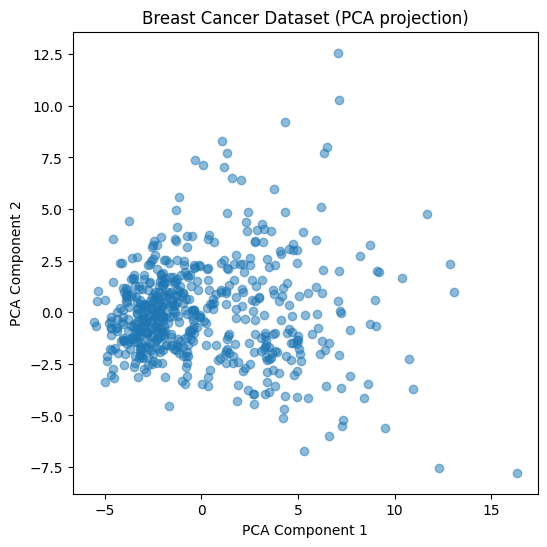

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Breast Cancer Dataset (PCA projection)")
plt.show()

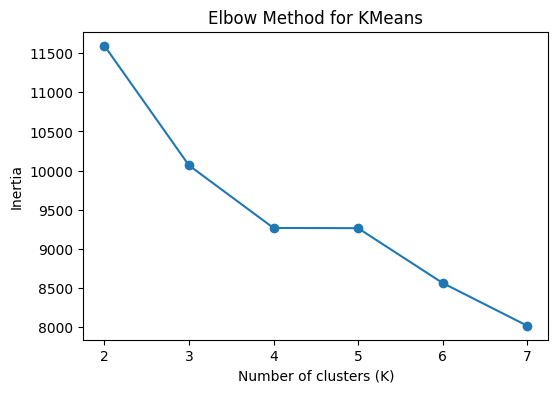

In [7]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score



# -----------------------------
# KMeans clustering (Elbow method)
# -----------------------------
inertias = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

# Plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()




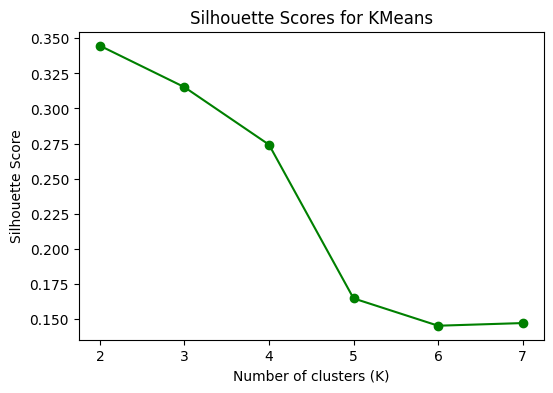

In [8]:
# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker="o", color="green")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans")
plt.show()

/tmp/ipython-input-3460906307.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["KMeans_Cluster"] = kmeans_labels


Cluster Means:
                   radius1   texture1  perimeter1        area1  smoothness1  \
KMeans_Cluster                                                               
0               21.253590  22.454872  143.041026  1429.994872     0.108574   
1               17.692000  21.311833  116.106583   986.785833     0.099811   
2               12.342948  18.142500   79.205690   478.578736     0.091430   
3               12.760532  19.823548   84.764677   514.554839     0.109672   

                compactness1  concavity1  concave_points1  symmetry1  \
KMeans_Cluster                                                         
0                   0.204085    0.257474         0.136419   0.209726   
1                   0.126144    0.139770         0.082274   0.186041   
2                   0.073882    0.039327         0.024553   0.171366   
3                   0.170365    0.161727         0.066087   0.208735   

                fractal_dimension1  ...   texture3  perimeter3        area3  \
KMe

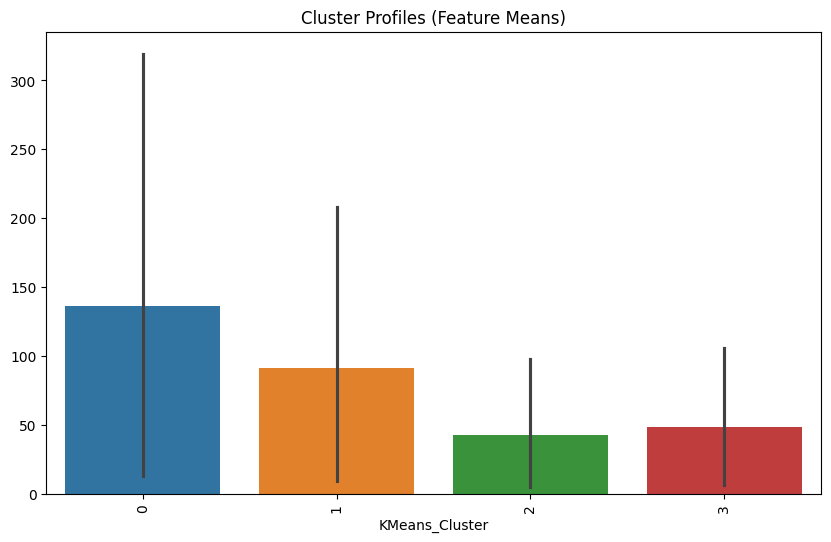

In [9]:
#- But in our case, the silhouette curve also shows a local maximum at K=4.
# - This means the data has structure that supports both 2 clusters (broad separation) and 4 clusters (finer subgroups)

# Choose K=4 (based on elbow + silhouette)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# -----------------------------
# 3. Hierarchical clustering (cross-check)
# -----------------------------
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_scaled)

# -----------------------------
# Profile clusters
# -----------------------------
X["KMeans_Cluster"] = kmeans_labels
X["Agglo_Cluster"] = agglo_labels

cluster_means = X.groupby("KMeans_Cluster").mean()
cluster_medians = X.groupby("KMeans_Cluster").median()

print("Cluster Means:\n", cluster_means)
print("\nCluster Medians:\n", cluster_medians)

# -----------------------------
# Visualize cluster profiles
# -----------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=cluster_means.T)
plt.xticks(rotation=90)
plt.title("Cluster Profiles (Feature Means)")
plt.show()

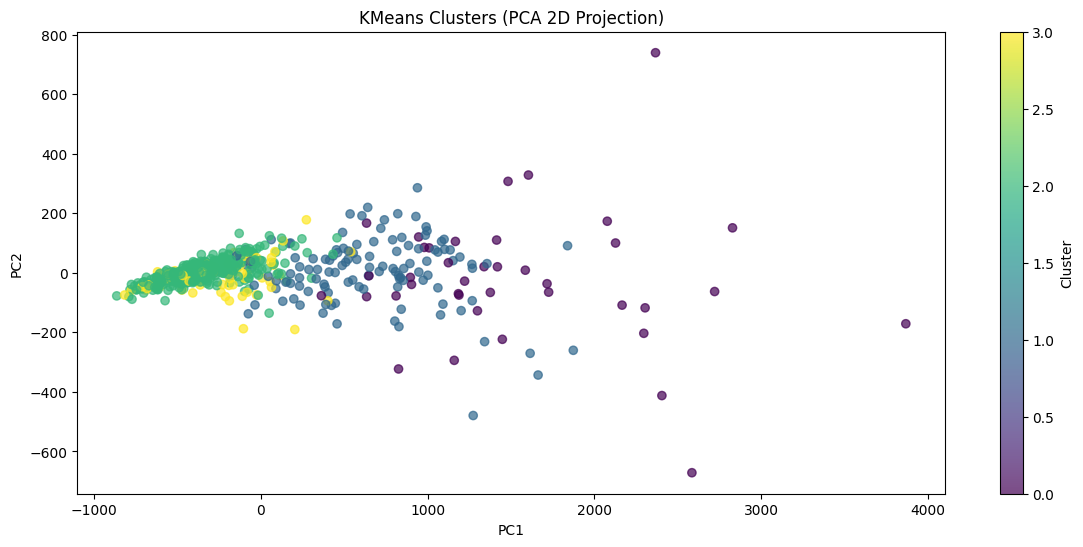

In [12]:
from sklearn.decomposition import PCA

# -----------------------------
# Scatter Plot of Clusters
# -----------------------------
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X.drop(columns=["KMeans_Cluster","Agglo_Cluster"], errors="ignore"))

plt.figure(figsize=(14,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=X["KMeans_Cluster"], cmap="viridis", alpha=0.7)
plt.title("KMeans Clusters (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.show()

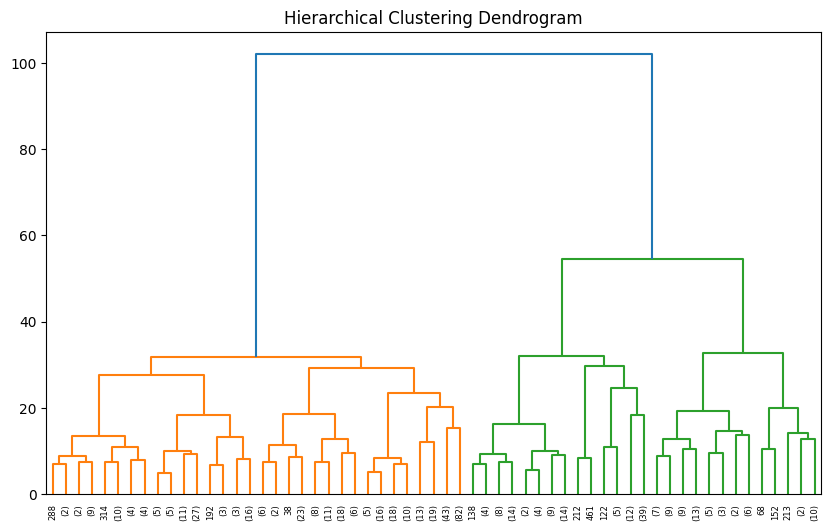

In [ ]:
# Hierarchical Clustering Dendrogram

from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [ ]:
# Generate cluster cards
# -----------------------------
for cluster in cluster_means.index:
    print(f"\n=== Cluster {cluster} Card ===")
    cluster_size = X[X['KMeans_Cluster'] == cluster].shape[0]
    print(f"Size: {cluster_size} patients")


=== Cluster 0 Card ===
Size: 39 patients

=== Cluster 1 Card ===
Size: 120 patients

=== Cluster 2 Card ===
Size: 348 patients

=== Cluster 3 Card ===
Size: 62 patients


### Both metrics agree: K=4 is a strong candidate.
### - K=2 gives broad separation (likely malignant vs benign).
### - K=4 reveals subtypes — possibly:
### - Aggressive malignant
### - Mild malignant
### - Dense benign
### - Sparse benign




## We are changing our k value to 2 as we have binary classification
## visualizing how it would look

Cluster Means:
                   radius1   texture1  perimeter1       area1  smoothness1  \
KMeans_Cluster                                                              
0               17.600702  21.403989  116.699840  997.632447     0.104610   
1               12.413378  18.246352   79.765906  485.766404     0.092289   

                compactness1  concavity1  concave_points1  symmetry1  \
KMeans_Cluster                                                         
0                   0.157850    0.179992         0.094290   0.197689   
1                   0.077938    0.043801         0.026532   0.173007   

                fractal_dimension1  ...   texture3  perimeter3        area3  \
KMeans_Cluster                      ...                                       
0                         0.064415  ...  28.852394   143.44266  1457.356383   
1                         0.062000  ...  24.110472    89.40790   595.981102   

                smoothness3  compactness3  concavity3  concave_points

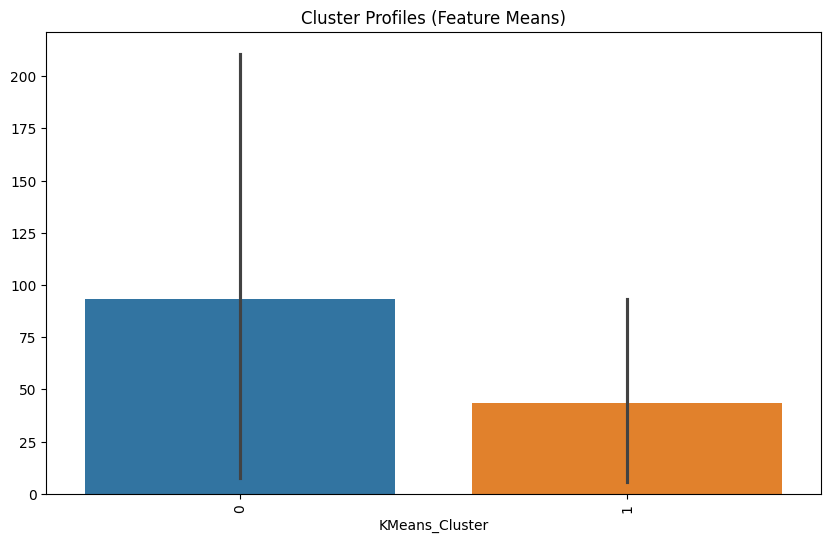

In [ ]:

# Choose K=2 for broader spectrum (based on elbow + silhouette)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# -----------------------------
# 3. Hierarchical clustering (cross-check)
# -----------------------------
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_scaled)

# -----------------------------
# Profile clusters
# -----------------------------
X["KMeans_Cluster"] = kmeans_labels
X["Agglo_Cluster"] = agglo_labels

cluster_means = X.groupby("KMeans_Cluster").mean()
cluster_medians = X.groupby("KMeans_Cluster").median()

print("Cluster Means:\n", cluster_means)
print("\nCluster Medians:\n", cluster_medians)

# -----------------------------
# Visualize cluster profiles
# -----------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=cluster_means.T)
plt.xticks(rotation=90)
plt.title("Cluster Profiles (Feature Means)")
plt.show()

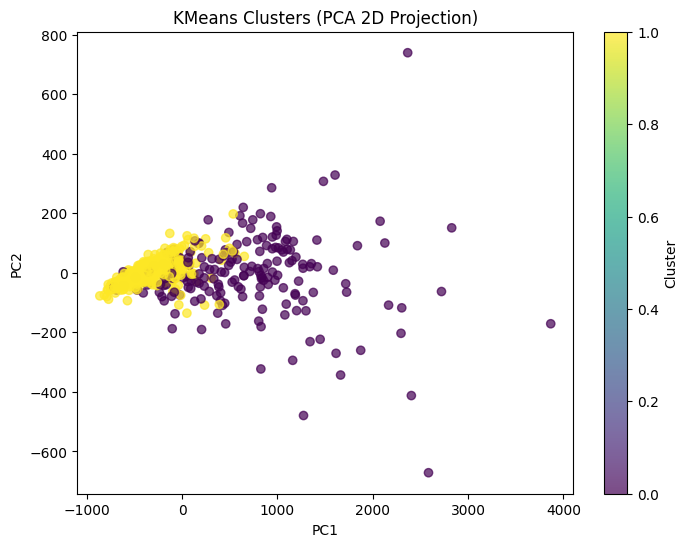

In [ ]:
from sklearn.decomposition import PCA

# -----------------------------
# Scatter Plot of Clusters
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=["KMeans_Cluster","Agglo_Cluster"], errors="ignore"))

plt.figure(figsize=(8,15))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=X["KMeans_Cluster"], cmap="viridis", alpha=0.7)
plt.title("KMeans Clusters (PCA 2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.show()

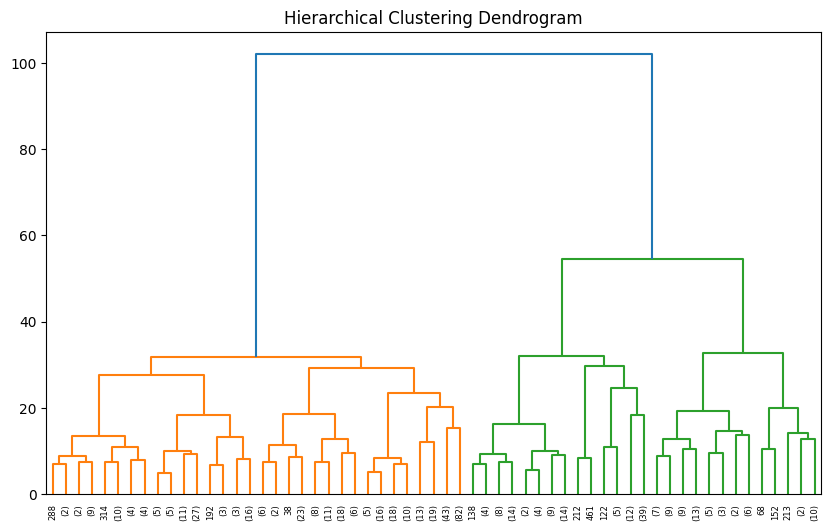

In [ ]:
# Hierarchical Clustering Dendrogram

from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [ ]:
# Generate cluster cards
# -----------------------------
for cluster in cluster_means.index:
    print(f"\n=== Cluster {cluster} Card ===")
    cluster_size = X[X['KMeans_Cluster'] == cluster].shape[0]
    print(f"Size: {cluster_size} patients")


=== Cluster 0 Card ===
Size: 188 patients

=== Cluster 1 Card ===
Size: 381 patients
